# Finding the maximum value of 2d function
Given equation:
\begin{align}
f(x, y) = 2xy + 2x - x^2 -2y^2
\end{align}

### Implementation of needed functions:

In [11]:
# Importing dependency functions and packages
from random import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D, get_test_data
from matplotlib import cm
import numpy as np
%matplotlib notebook

# function
def f(x, y):
    return 2*x*y + 2*x - x**2 - 2*y**2

# random search algorithm
def random_search(f, n, xl, xu, yl, yu):
#     generate lists of random x and y values
    x_cand = [xl + (xu - xl)*random() for _ in range(n)]
    y_cand = [yl + (yu - yl)*random() for _ in range(n)]
    
#     calculate appropriate to x and y values function values
    poss_max = [f(x, y) for x, y in zip(x_cand, y_cand)]
    
#     finding index of maximum value (argmax)
    max_val = max(poss_max)
    max_indexes = [i for i, j in enumerate(poss_max) if j == max_val]
    
#     return maximum value of function and its parameters x, y
    return max_val, x_cand[max_indexes[0]], y_cand[max_indexes[0]]

# simple rms error function
def rms_error(x_ref, y_ref, x, y):
    return np.sqrt(((x_ref - x)/x_ref)**2 + ((y_ref - y)/y_ref)**2)

The problem is in guessing limits of parameters (x, y) for random number generation. The smaller limits are, the bigger accuracy we will get. Let's visualize function and judge from there.

<IPython.core.display.Javascript object>


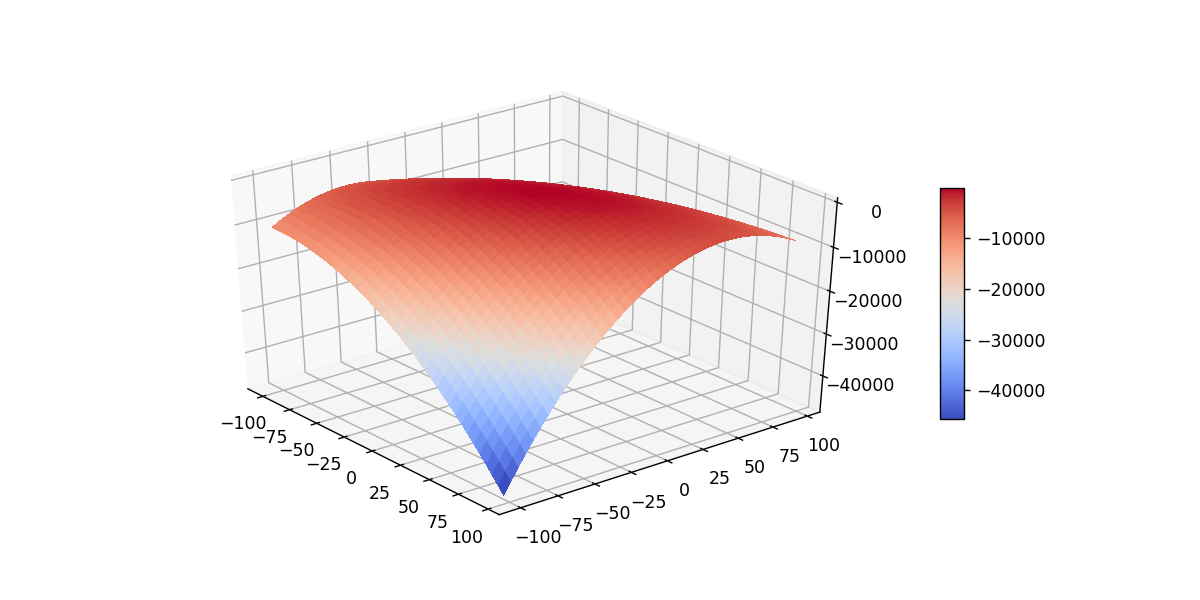

In [10]:
fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1, 1, 1, projection='3d')
x = np.arange(-100, 100, 5)
y = np.arange(-100, 100, 5)
x, y = np.meshgrid(x, y)
z = f(x, y)
surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=10)
plt.show()

From above 3D plot it is seen that solution lies between -50 and 50 for both parameters x, y. 

In [7]:
f_ref, x_ref, y_ref = random_search(f, 10000000, -50, 50, -50, 50)
print('Using 10000000 random points and ranges between -50 and 50, it is found that maximum value of given function is:', f_ref)

Using 10000000 random points and ranges between -50 and 50, it is found that maximum value of given function is: 1.999732917847197


The roots found using random search method using 10 million points and considered as reference roots and as ideal. This is done in order to determine root-mean-square error somehow and find dependency of error to number of random points. Since reference roots are found using 10 million random points, it is more accurate than roots found below for error plotting reasons.

<IPython.core.display.Javascript object>


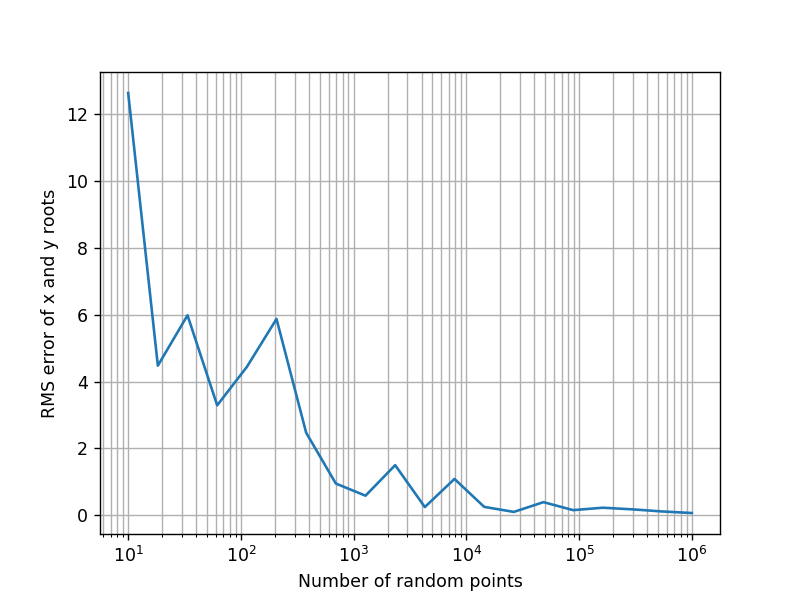

In [29]:
error_list = []
for n in np.logspace(1, 6, num=20):
    _, x, y = random_search(f, int(n), -50, 50, -50, 50)
    error_list += [rms_error(x_ref, y_ref, x, y)]
plt.semilogx(np.logspace(1, 6, num=20), error_list, '-')
plt.grid(which='both')
plt.xlabel('Number of random points')
plt.ylabel('RMS error of x and y roots')
plt.show()

From error vs #of_points plot it is seen that line have linear dependency on number of random points (Exponential shape on log-scale). This confirms the fact that x and y values are generated uniformly and increased number of random points also increases accuracy linearly, distributing on 2d space equally.